# YOLO Object Detection
YOLO stands for "You Only Look Once". It has become the standard way of detection of objects in the field of computer vision, thanks to its speed.

The algorithm was introduced in 2015 by Joseph Redmon. And ever since it came out it has surpassed other algorithms such as sliding window object detection, R CNN, Fast R CNN, Faster R CNN, etc.

## YOLO algorithm
The idea is to split an image in cells, and applying classification to each part of the grid.
YOLO assigns an object to the cell which contains the mid-point of the object.

## Intersection Over Union (IOU)
Intersection Over Union is a function which is really helpful for measuring the **overlap between two boxes**.
$$IOU = \frac{size \: of \: \cap}{size \: of \: \cup} \ge 0.5$$

## Non-max Suppression
To be sure that the algorithm is not spotting the same object twice, we introduce the non-max suppression.
This algorithm cleans up the double detection of an object by performing some steps:
1. It takes the highest $p_c$, the confidence of the algorithm.
2. It compares the reamining rectangles and suppress the one with the highest $IOU$.

In [ ]:
# YOLO repository and dependencies
!pip install ultralytics
!git clone https://github.com/ultralytics/yolov5
!cd yolov5
!pip install -r requirements.txt

In [ ]:
# Import the necessary libraries
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os

# Pretrained model
Training from scratch would be very expensive, so I am using a pretrained model, provided by the **Ultralytics** library.

In [ ]:
# Load a pre-trained YOLOv5 model (YOLOv5s is the small version, which is fast and accurate)
model = YOLO('yolov5su.pt', task='detect')

In [ ]:
# Load an image
image_path = '0012.jpg'
image = cv2.imread(image_path)

In [ ]:
# Perform object detection
results = model(image_path)
result = results[0]


image 1/1 /content/0012.jpg: 384x640 2 persons, 4 cars, 3 traffic lights, 1593.6ms
Speed: 14.6ms preprocess, 1593.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
# Display the detected objects on the image
result.show()

# Display the annotated image
annotated_image = result.plot()

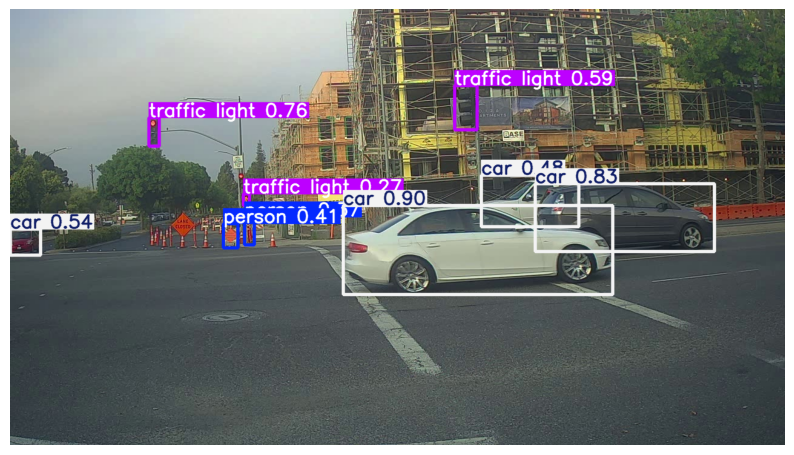

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Load image and get a prediction

In [ ]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
  with open(filename, 'wb') as f:
    f.write(uploaded[filename])
  image_path = filename  # Store the path to the uploaded image

results = model(image_path)
result = results[0]
result.show()
annotated_image = result.plot()

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

if (len(result.boxes.data) < 1):
  print("No object detected")
else:
  print(f"{len(result.boxes.data)} objects detected")

## References
- [Convolutional Neural Networks (DeepLearning.AI)](https://www.coursera.org/learn/convolutional-neural-networks)
- [What is YOLO algorithm - Medium](https://medium.com/@ishudey11032002/what-is-yolo-algorithm-ef5a3326510b)